<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1 - Import necessary libraries
import pandas as pd
import seaborn as sns
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

# unzip CollegeScorecard_Raw_Data
!unzip /content/CollegeScorecard_Raw_Data.zip

Archive:  /content/CollegeScorecard_Raw_Data.zip
   creating: CollegeScorecard_Raw_Data/
  inflating: CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv  
  inflating: CollegeScorecard_Raw_Data/.DS_Store  
  inflating: CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv  
  inflating: CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv  
  inflating: CollegeScorecard_Raw_Data/Crosswalks.zip  
  inflating: CollegeScorecard_Raw_Data/MERGED200

In [3]:
# Retrieve only useful files
file_list = glob.glob('/content/CollegeScorecard_Raw_Data/MERGED*')

In [4]:
# Display 22 files
file_list

['/content/CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MER

In [5]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
random_int = random.randrange(0,21)
year = file_list[random_int-1]
year

'/content/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv'

In [6]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
read_year = pd.read_csv(year)
df = pd.DataFrame(read_year,columns=['INSTNM','TUITIONFEE_IN'])
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,1537,1540,1542,1589,1606,1610,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INSTNM,TUITIONFEE_IN
0,Alabama A & M University,9096.0
1,University of Alabama at Birmingham,7510.0
2,Amridge University,6900.0
3,University of Alabama in Huntsville,9158.0
4,Alabama State University,8720.0


In [7]:
# from this file into a data frame aand display use info() function to display a summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7766 non-null   object 
 1   TUITIONFEE_IN  4407 non-null   float64
dtypes: float64(1), object(1)
memory usage: 121.5+ KB


In [8]:
# 5 - Find out how many observations have missing value.
df.isnull().sum()

INSTNM              0
TUITIONFEE_IN    3359
dtype: int64

In [9]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407 entries, 0 to 7764
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4407 non-null   object 
 1   TUITIONFEE_IN  4407 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.3+ KB


In [10]:
# 7 - Find out how many observations have 0 tution. 
zero = df.loc[df['TUITIONFEE_IN'] == 0]
zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 7431 to 7431
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         1 non-null      object 
 1   TUITIONFEE_IN  1 non-null      float64
dtypes: float64(1), object(1)
memory usage: 24.0+ bytes


In [11]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df = df[df.TUITIONFEE_IN != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 0 to 7764
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4406 non-null   object 
 1   TUITIONFEE_IN  4406 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.3+ KB


In [12]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 
mean = np.mean(df['TUITIONFEE_IN'])
mean

14151.408533817521

In [13]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
sample = df['TUITIONFEE_IN'].sample()
sample

5803    26780.0
Name: TUITIONFEE_IN, dtype: float64

In [14]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
difference = mean - sample
difference


5803   -12628.591466
Name: TUITIONFEE_IN, dtype: float64

In [15]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
difference_10 = (df['TUITIONFEE_IN'].sample(10)) - mean
difference_10

6496    -1176.408534
2808    12148.591466
305    -12835.408534
5806     1012.591466
3036    -2247.408534
5375    -1761.408534
1491   -10456.408534
995     28078.591466
4276   -12132.408534
5569      -49.408534
Name: TUITIONFEE_IN, dtype: float64

In [16]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
df_two = df['TUITIONFEE_IN'].sample(20)
df_two

3287    38630.0
4140     3965.0
3076     4148.0
4266     6495.0
4233     5580.0
2836     5210.0
6138    12975.0
4701    13200.0
5318    15000.0
99      17050.0
2184     6750.0
6132    12906.0
1065    41645.0
359      1326.0
940     20015.0
3676    17668.0
4030     3778.0
3689     2295.0
3122     3393.0
90       1800.0
Name: TUITIONFEE_IN, dtype: float64

In [17]:
# 14 - Calculate and displat the mean tuition of these 20 observations
mean_20 = np.mean(df_two)
mean_20

11691.45

In [18]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
difference_mean_20 = mean_20 - mean
difference_mean_20

-2459.95853381752

In [19]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
difference_mean_list = []
for i in range(10):
  difference_mean_20 = (np.mean((df['TUITIONFEE_IN'].sample(20)))) - mean
  difference_mean_list.append(difference_mean_20)
difference_mean_list

[6292.341466182479,
 1088.7914661824798,
 2476.4914661824805,
 838.9414661824794,
 -572.158533817521,
 -363.40853381752095,
 4762.04146618248,
 5498.341466182479,
 -3315.95853381752,
 6146.04146618248]

### - from these observations it appears that the difference in means calculated with a sample size of 20 tends to be closer to the mean of the total population compared to the difference between just one value and the total mean. 

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [21]:
# 17 - write function Code here
def mean_op(x,y):
    sample_mean = np.mean((y.sample(20)))
    total_mean = np.mean(df['TUITIONFEE_IN'])
    diff_mean = total_mean - sample_mean
    return diff_mean

In [22]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
mean_op(20,df['TUITIONFEE_IN'])

1196.3085338175206

In [23]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_size = []
for i in range(1,51):
    sample_size.append(i)
sample_size

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [24]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff = []
for i in sample_size:
    sample1 = np.mean((df['TUITIONFEE_IN'].sample(i)))
    pop_mean = np.mean(df['TUITIONFEE_IN'])
    diff_means = pop_mean - sample1
    means_diff.append(diff_means)
print(means_diff)


[10401.408533817521, 578.408533817521, 10527.408533817521, 5854.658533817521, 2225.20853381752, 5597.908533817521, -3519.1628947539066, -749.091466182479, 5268.186311595298, -1103.4914661824787, -3995.318738909751, -1509.258132849145, -8647.206850797862, 999.9799623889503, -1615.924799515813, 615.596033817521, -4672.767936770713, -1129.4803550713677, -1205.1704135509008, -3353.1414661824783, 1133.7894861984732, -1878.136920727933, -1151.591466182479, 343.9918671508549, -1486.4714661824783, -1510.3222354132486, -1951.5173921084042, 2950.301390960378, 824.5464648520028, -1366.924799515813, -1310.946304892157, 1959.002283817521, 450.37823078721703, -6147.8855838295385, -2478.1628947539066, 1333.8807560397436, -528.6995742905874, -1067.5125188140573, -457.12992772094003, -1938.8914661824783, 807.408533817521, -1956.6628947539084, -590.4054196708512, -537.6369207279331, 1088.7863115952987, 387.038968600129, -770.6552959697128, 1627.846033817521, -530.1220784273773, 907.5085338175213]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


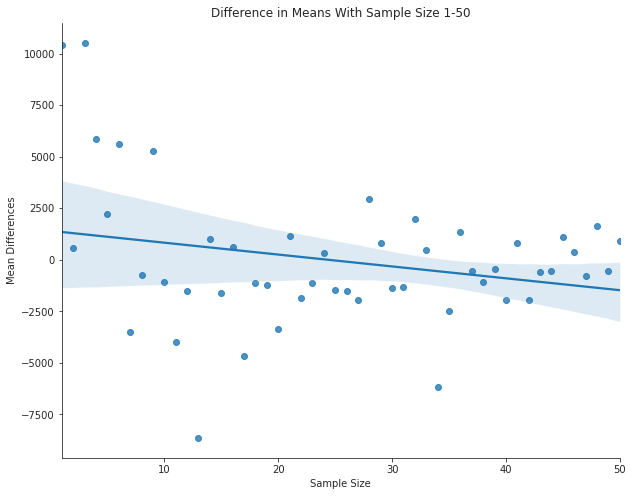

In [25]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(sample_size, means_diff, ax=ax)
sns.despine()
plt.xlabel("Sample Size")
plt.ylabel("Mean Differences")
plt.title("Difference in Means With Sample Size 1-50")
plt.show()

In [26]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
sample_size2 = []
for i in range(1,501):
    sample_size2.append(i)
sample_size2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [27]:
# function to find difference in mean between the total population and 500 random samples
means_diff1 = []
for i in sample_size2:
    sample1 = np.mean((df['TUITIONFEE_IN'].sample(i)))
    pop_mean = np.mean(df['TUITIONFEE_IN'])
    diff_means = pop_mean - sample1
    means_diff1.append(diff_means)
print(means_diff1)

[-12816.591466182479, 7937.408533817521, 2255.075200484187, 4586.158533817521, 2982.20853381752, -119.25813284914511, -4968.44860903962, -2654.216466182479, -4668.147021738034, -4021.4914661824805, 4119.408533817521, 4591.491867150855, 223.87007227905997, 3271.3371052460916, 4888.408533817521, 512.283533817521, 7101.7026514645795, 3034.575200484187, -702.9072556561641, -281.6414661824783, -1400.8295614205745, 519.590351999339, 2121.886794687087, 529.2418671508549, 1554.6085338175217, 775.0239184329057, 518.5937190027053, 1587.1228195318072, 2630.33956830028, -1887.758132849145, -85.78501456957565, 2942.564783817521, -5795.015708606723, -682.3267603001259, 1364.9513909603775, -1071.341466182479, 1288.6247500337377, -3433.801992498269, -2452.591466182479, -1076.8664661824787, -295.1280515483322, 1480.6942481032347, 1908.7341152128702, -1663.727829818843, 2047.5196449286323, 890.430272947955, 467.5787465834783, 695.137700484187, 494.32690116445883, 5.70853381752022, 874.330102444972, -175

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


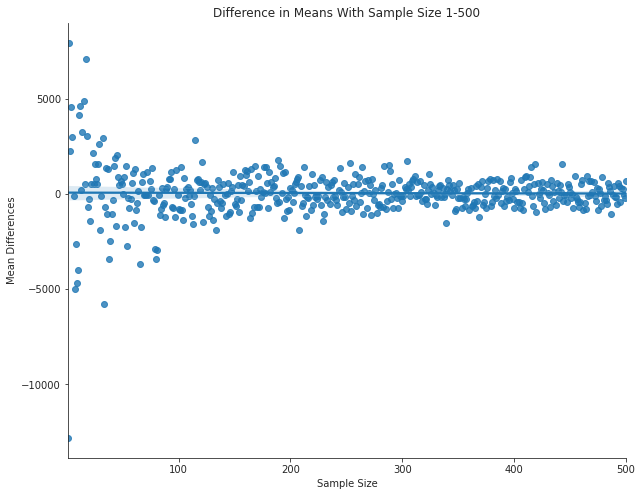

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(sample_size2, means_diff1, ax=ax)
sns.despine()
plt.xlabel("Sample Size")
plt.ylabel("Mean Differences")
plt.title("Difference in Means With Sample Size 1-500")
plt.show()

In [ ]:
# The end - Give yourself a pat on the back!